# 01장. 이미지 처리에 대한 소개
### 1. 이미지
+ 픽셀(pixel)이라 불리는 것으로 구성된 2차원 격차. 
    + 각 셀은 공식적으로는 화소라고 불린다. 
+ 컴퓨터에서 영상은 2차원 행렬이며, 행렬의 각 셀은 이미지의 해당 픽셀 값을 저장하고 있다.
+ 이미지 처리의 핵심은 
  
  1) 색
  
  2) 픽셀 간의 상호 관계
  
  3) 물체 배치
  
  4) 에지, 물체, 윤곽선 등 이미지 특징
  
  등의 정보를 추출하는 것이다.

### 2. 이미지 처리 라이브러리
+ 책에서는 __scikit-image__와 __Pillow__를 사용한다.
  
  **1) Pillow 사용법**

In [4]:
#이미지 읽기
#Pillow의 이미지 모듈은 jpg | png 파일 이미지를 읽기 위해 open() 함수를 제공.

from PIL import Image

#이 함수는 픽셀 유형, 이미지 크기, 이미지 형식과 같은 정보가 들어있는 이미지 객체를 반환한다.
img = Image.open("원본 포비.jpg")

#화면에 이미지를 표시하기 위해 다음과 같이 show() 함수를 사용한다.
img.show()

In [5]:
#이미지 쓰기/저장
#이미지를 컴퓨터의 파일에 쓰거나 저장하려면 이미지 객체의 save() 함수를 사용한다.

#상대 경로를 사용함
img.save("temp_pobi.png")

#절대 경로를 사용함
img.save("/Temp/temp_pobi.png")

In [10]:
#이미지 자르기
#원본 이미지에서 작은 특정 영역을 추출하는 방법으로, 관심 영역(ROI, Region of Interest)을 설정하는 것이다.
#ROI는 해당 영역에서만 특정 알고리즘을 실행하려는 경우 유용하다.

#왼쪽 위 꼭지점과 오른쪽 아래 꼭지점 튜플값 설정
dim = (10, 10, 110, 50)
#crop에 좌표계를 넘기고, 잘려진 이미지를 반환받음.
crop_img = img.crop(dim)
crop_img.show()

**2) 색상 공간 변경**
  + 색상 공간 및 채널은 여러 좌표계를 이용한다. 2-D 직교 평면과 2-D 극좌표에서 점은 (x, y) 또는 (r,  θ)로 저장된다.
  + 이와 비슷하게 이미지 처리에서도 여러 색상 공간들이 있다.
    + 이미지의 색상 값은 __RGB__나 __CMYK__(Cyan(사이언), Magenta(마젠타), Yellow(노랑), Key(검정)), __HSV__(Hue(색상), Saturation(채도), Value(명도)) 등의 형태가 있다.
    + 색상 공간의 각 값은 색상 채널이라고 한다. 예를 들어 RGB color space에서 Red, Green, Blue 각각은 이미지 채널이다.
  + 이미지에서 볼 수 있는 색상은 color space의 각 채널에 있는 색상이 혼합된 값이다.
  + __GrayScale__ : 컴퓨터에 저장하는 측면에서 가장 간단한 color space 중 하나. 그레이스케일 이미지의 각 픽셀 값은 0과 255 사이에 있는 하나의 값이며, 0은 검은색 ~ 255는 흰색을 나타낸다. 
    + 255 값은 고정 값은 아니고, 이미지의 깊이에 따라서 달라진다.
    + 그레이스케일 이미지를 흑백 이미지라고도 하지만, 흑백 이미지에서 픽셀 값은 0 혹은 255만을 가지고 사잇값이 없기 때문에 전적으로 옳은 표현은 아니다.
  + __RGB__ : 가장 널리 사용되는 color space. 각 픽셀은 세 가지 채널 값(R, G, B)의 조합. 
    + 흰색은 (255, 255, 255), 검은색은 (0, 0, 0), Red는 (255, 0, 0), Green은 (0, 255, 0), Blue는 (0, 0, 255) 로 표현된다.
  + __HSV__ : RGB 값을 원통에 투영하는 원통형 좌표계다.
    + RGB 공간에서는 색이 어떻게 진행되는지를 파악하는 것이 직관적이지 않았고, 그 문제를 해결한 color space다.
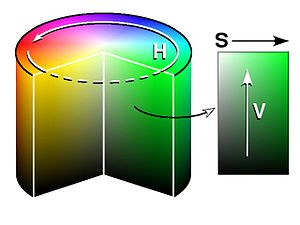
                                              그림 : HSV 색 공간 원기둥 모형 (출처 : 위키피디아)
  + 그레이스케일 이미지의 픽셀 값을 출력하면 하나의 값만 얻지만, RGB 이미지의 픽셀 값을 출력하면 세 개의 값을 얻는다.
  + 이는 그레이스케일은 한 개, RGB가 세 개의 채널을 갖고 있기 때문이다.
    + 그레이스케일 이미지는 한 개의 2D 행렬, RGB는 세 개의 2D 행렬을 갖는다.

In [13]:
#RGB 이미지의 픽셀 값 출력
print(img.getpixel((10, 10)))

#Grayscale 이미지의 픽셀 값 출력
print(img.convert("L").getpixel((10,10)))

(255, 255, 255)
255


**3) 이미지 깊이**
  + 이미지 깊이 또는 색상 깊이는 픽셀의 __색을 나타내는 데 사용되는 비트 수__다. 
    + 예를 들어 4비트인 이미지의 경우 픽셀 값은 0 ~ 15까지의 값을 갖는다. 반면에 8비트를 사용한다면, 0 ~ 255까지의 범위를 가지므로 더 미세한 컬러 스펙트럼을 제공할 수 있게 된다.
  + 이미지 모듈의 변환 함수를 사용해 이미지를 A color space에서 B color space로 바꿀 수 있다.

In [15]:
#grayscale 이미지로 변환하는 함수
grayscale = img.convert("L")
grayscale.show()

**4) 기하학적 변환**
  + 이미지에 대해 크기 변환, 회전, 뒤집기와 같은 여러 유형의 변환을 수행해야 하는 경우, 아래와 같은 함수를 사용한다.
 

In [18]:
#크기 변환
resize_img = img.resize((200, 200))
resize_img.show()

#회전
rotate_img = img.rotate(-90)
rotate_img.show()

**5) 이미지 향상**
  + 이미지 향상으로는 대비, 밝기, 색상 밸런스, 선명도 변경과 같은 작업이 포함된다.
  + Pillow에서는 이런 작업을 수행하기 위한 모듈로 ImageEnhance를 제공한다.